In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures



In [184]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df = pd.read_csv(url, sep=',')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [185]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [186]:
df.shape

(1338, 7)

In [187]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Analisis de var categoricas

In [188]:
df['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

In [189]:
sex_dic = {'male': 1, 'female': 0}
df['sex'] = df['sex'].map(sex_dic)
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [190]:
df['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [191]:
smoker_dic = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(smoker_dic)
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [192]:
df['region'].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [193]:
region_dic = {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}
df['region'] = df['region'].map(region_dic)
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


Variables numéricas

Chequear si variable dependiente está balanceada o no.

<AxesSubplot:>

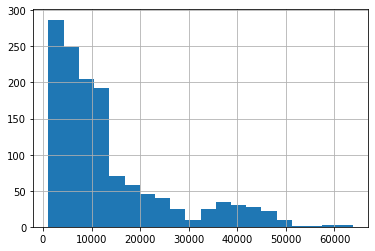

In [194]:
df['charges'].hist(bins=20)


<AxesSubplot:>

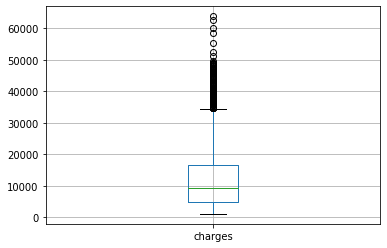

In [195]:
df.boxplot(column='charges')


In [196]:
df['charges_log'] = np.log10(df['charges']+10**(-6))
df


,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,0,27.900,0,1,1,16884.92400,4.227499
1,18,1,33.770,1,0,0,1725.55230,3.236928
2,28,1,33.000,3,0,0,4449.46200,3.648308
3,33,1,22.705,0,0,2,21984.47061,4.342116
4,32,1,28.880,0,0,2,3866.85520,3.587358
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830,4.025328
1334,18,0,31.920,0,0,3,2205.98080,3.343602
1335,18,0,36.850,0,0,0,1629.83350,3.212143
1336,21,0,25.800,0,0,1,2007.94500,3.302752


<AxesSubplot:>

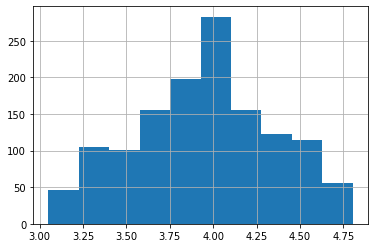

In [197]:
df['charges_log'].hist()
# Para sacar la métrica real del error tendríamos que realizar la inversa de la transformación.


<AxesSubplot:>

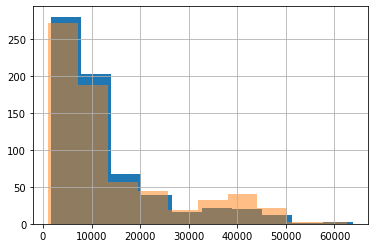

In [198]:
df['charges'][df['sex'] == 0].hist()
df['charges'][df['sex'] == 1].hist(alpha=0.5)


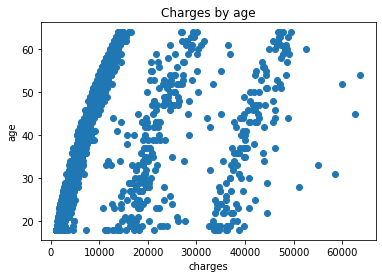

In [199]:
plt.plot(df['charges'], df['age'], 'o')
plt.title('Charges by age')
plt.xlabel('charges')
plt.ylabel('age')
plt.show()


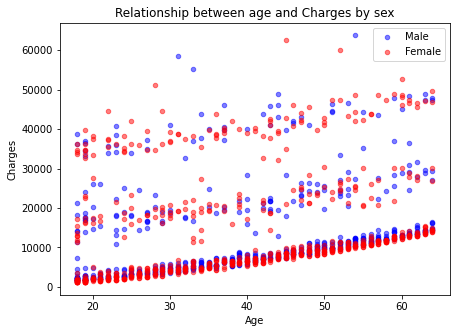

In [200]:
ax1 = df[df['sex'] == 0].plot(kind='scatter', x='age', y='charges', color='blue', alpha=0.5, figsize=(7,5))
df[df['sex'] == 1].plot(kind='scatter', x='age', y='charges', color='red', alpha=0.5, figsize=(7,5), ax=ax1)
plt.legend(labels=['Male', 'Female'])
plt.title('Relationship between age and Charges by sex', size=12)
plt.xlabel('Age', size=10)
plt.ylabel('Charges', size=10);

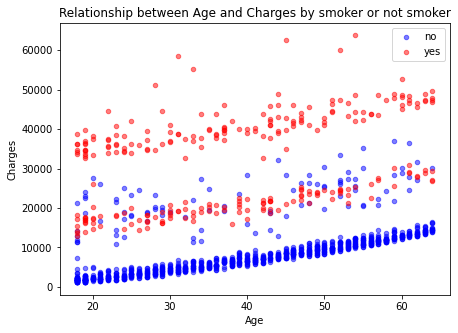

In [201]:
ax1 = df[df['smoker'] == 0].plot(kind='scatter', x='age', y='charges', color='blue', alpha=0.5, figsize=(7,5))
df[df['smoker'] == 1].plot(kind='scatter', x='age', y='charges', color='red', alpha=0.5, figsize=(7,5), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Age and Charges by smoker or not smoker', size=12)
plt.xlabel('Age', size=10)
plt.ylabel('Charges', size=10);

In [202]:
fig = px.box(df, x="children", y="charges")
fig.show()

<AxesSubplot:>

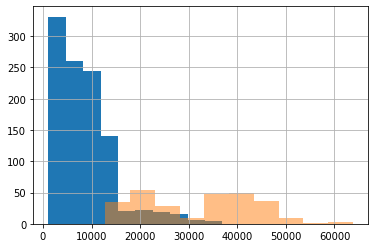

In [203]:
df['charges'][df['smoker'] == 0].hist()
df['charges'][df['smoker'] == 1].hist(alpha=0.5)

In [204]:
fig = px.box(df, x="region", y="charges")
fig.show()

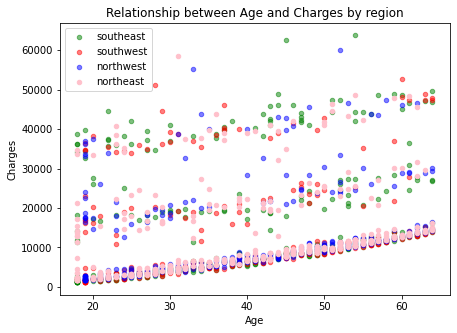

In [205]:
ax1 = df[df['region'] == 0].plot(kind='scatter', x='age', y='charges', color='green', alpha=0.5, figsize=(7,5))
df[df['region'] == 1].plot(kind='scatter', x='age', y='charges', color='red', alpha=0.5, figsize=(7,5), ax=ax1)
df[df['region'] == 2].plot(kind='scatter', x='age', y='charges', color='blue', alpha=0.5, figsize=(7,5), ax=ax1)
df[df['region'] == 3].plot(kind='scatter', x='age', y='charges', color='pink', figsize=(7,5), ax=ax1)
plt.legend(labels=['southeast', 'southwest', 'northwest', 'northeast'])
plt.title('Relationship between Age and Charges by region', size=12)
plt.xlabel('Age', size=10)
plt.ylabel('Charges', size=10);

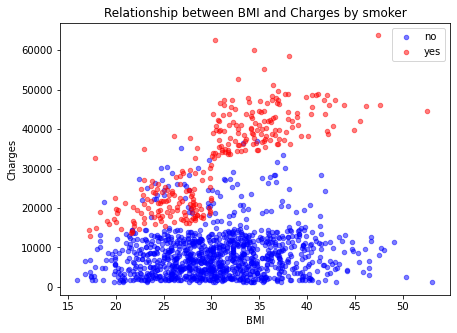

In [206]:
ax1 = df[df['smoker'] == 0].plot(kind='scatter', x='bmi', y='charges', color='blue', alpha=0.5, figsize=(7,5))
df[df['smoker'] == 1].plot(kind='scatter', x='bmi', y='charges', color='red', alpha=0.5, figsize=(7,5), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between BMI and Charges by smoker', size=12)
plt.xlabel('BMI', size=10)
plt.ylabel('Charges', size=10);

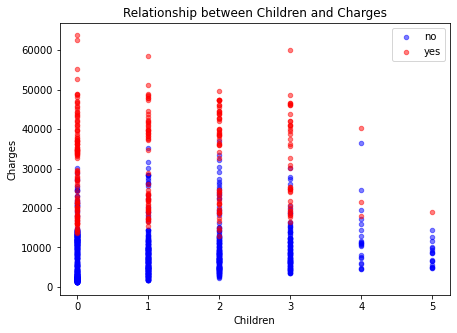

In [207]:
# scatter plot charges según children, identificando con colores si fuma o no fuma
ax1 = df[df['smoker'] == 0].plot(kind='scatter', x='children', y='charges', color='blue', alpha=0.5, figsize=(7,5))
df[df['smoker'] == 1].plot(kind='scatter', x='children', y='charges', color='red', alpha=0.5, figsize=(7,5), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Children and Charges', size=12)
plt.xlabel('Children', size=10)
plt.ylabel('Charges', size=10);

Los fumadores siempre pagan más.
Parecería haber tres "tipos" de seguros.
No parecería existir relación con la región.

Probando variable charges sin transformación:

In [208]:
X=df.drop(columns=['charges','charges_log'])
y=df['charges']

In [209]:
X_train,X_test_aux,y_train, y_test_aux=train_test_split(X,y,test_size=0.3,random_state=412)
print(X_train.shape,y_train.shape)
print(X_test_aux.shape,y_test_aux.shape)


(936, 6) (936,)
(402, 6) (402,)


In [210]:
X_val,X_test,y_val,y_test=train_test_split(X_test_aux,y_test_aux,test_size=0.5,random_state=142)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(936, 6) (936,)
(201, 6) (201,)
(201, 6) (201,)


In [211]:
mi_modelo=LinearRegression()

In [212]:
mi_modelo.fit(X_train,y_train)
print("intercept: ",mi_modelo.intercept_)
print("variables: ",X_train.columns)
print("coeficiente: ",mi_modelo.coef_)

intercept:  -13906.33070393977
variables:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')
coeficiente:  [  259.05311719    73.91290537   355.59371568   528.90342213
 23338.2943758    496.16068167]


In [213]:
y_val_pred=mi_modelo.predict(X_val)
y_train_pred=mi_modelo.predict(X_train)

In [214]:
print('MAE TRAIN:', metrics.mean_absolute_error(y_train, y_train_pred))
print("MSE TRAIN:", metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE TRAIN:",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print("MAE VALIDATION:",metrics.mean_absolute_error(y_val, y_val_pred))
print("MSE VALIDATION:",metrics.mean_squared_error(y_val, y_val_pred))
print("RMSE VALIDATION:",np.sqrt(metrics.mean_squared_error(y_val, y_val_pred)))

MAE TRAIN: 4232.427717701142
MSE TRAIN: 37003594.23500854
RMSE TRAIN: 6083.057967421364
MAE VALIDATION: 4422.978923060145
MSE VALIDATION: 38899598.32215014
RMSE VALIDATION: 6236.954250445496


Modelo polinomial

In [215]:
#poly_feature = PolynomialFeatures(degree=2)
#x_poly_train = poly_feature.fit_transform(X_train)
#x_poly_test = poly_feature.fit_transform(X_test)
#modelo5 = mi_modelo.fit(x_poly_train, y_train)

In [216]:
#y_pred_poly = modelo5.predict(x_poly_test)
#print("Modelo de segundo grado")
#print("MAE:",metrics.mean_absolute_error(y_test, y_pred_poly))
#print("MSE:",metrics.mean_squared_error(y_test, y_pred_poly))
#print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

In [217]:
# ejemplo
edad = 33
sex = 1
bm = 22
children = 0
smoker = 1
region = 3

In [218]:
print('Predicted prima : \n', mi_modelo.predict([[edad,sex,bm,children,smoker,region]]))


Predicted prima : 
 [27366.17323456]


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

